**Протокол технологических испытаний БП верификации**

Полное наименование заказчика испытаний: ...

Обозначение алгоритма: ...

Полное наименование организации разработавшей алгоритм: ...

Обозначение базы данных: ...

Полное наименование организации предоставившей базу данных: ...

Полное наименование лаборатории, проводившей испытания: ...

ФИО руководителя лаборатории: ...

ФИО сотрудника лаборатории, проводившего испытания: ...

Адрес испытательной лаборатории: ...

Перечень руководящих документов: ...

In [1]:
# Раскомментируйте строку чтобы установить зависимости, требуется при первом зпуске на машине
#!pip install -r ./requirements.txt

In [2]:
import os
import vdrawutils
from datetime import datetime

In [3]:
print(f"Дата и время начала испытаний: {datetime.now().strftime('%d.%m.%Y %H:%M:%S')}")

Дата и время начала испытаний: 22.12.2021 19:03:14


In [4]:
# Укажите параметры подключения к базе биометрических образцов
os.environ['VT_DB_OPT']  = '/home/alex/Testdata/EBS/Identification'

# Укажите наименование вендора БП
os.environ['VT_API_VENDOR'] = 'Tinkoff Face Recognition'

# Укажите версию БП
os.environ['VT_API_VERSION'] = 'v1.0.1'

# Укажите модальность БП
os.environ['VT_API_MODALITY'] = 'face'

# Укажите базовый URL на котором размещено API БП
os.environ['VT_HOST_URL']  = 'http://localhost:5000'

# Укажите префикс URL
os.environ['VT_URL_PREFIX']  = ''

# Укажите куда сохранять результаты
os.environ['VT_RESULTS_PATH']  = './results'

# Укажите размер дистрибутива БП в байтах
os.environ['VT_DISTRIB_SIZE'] = '2603954049'

# Укажите число параллельных потоков для этапа сравнения шаблонов
os.environ['COMPARISION_THREADS'] = f'{os.cpu_count()}'

In [5]:
%run vtest.py --envcontrol --securelog  

Проверка наличия пути для сохранения результатов:
 - путь существует

Запуск мониторинга нагрузки на систему:
 - мониторинг запущен

Создание лог-файла:
 - './results/v_insightface_antelope2.log'

Тест запущен с параметрами:
 - БД:          /home/alex/Testdata/EBS/Identification
 - вендор:      insightface
 - модальность: face
 - версия:      antelope2
 - URL:         http://localhost:5000
 - Результаты:  ./results

Проверка исправности БП:
/health - [200] - {'status': 0}

Подключение к БД:
Найдено биометрических образцов:
 - регистрационных: 31
 - верификационных: 84 (самозванцев: 24)

Извлечение регистрационных шаблонов:
100%|██████████| 31/31 [00:01<00:00, 18.40it/s]
 - отказов регистрации: 1
 - размер биометрического контрольного шаблона: 2048 байт

Извлечение верификационных шаблонов:
100%|██████████| 84/84 [00:03<00:00, 25.34it/s]
 - отказов сбора данных: 3
 - размер биометрического шаблона: 2048 байт

Сравнение (верификация):
 - сравнение, число параллельных потоков: 4
100%|████

In [6]:
# Укажите ключ по которому нужно отфильтровать протоколы, если требуется вывести все укажите key = ''
key = os.getenv('VT_API_VENDOR')

# Оставьте без изменений
df, adf = vdrawutils.makeTable(path=os.getenv('VT_RESULTS_PATH'), name_filter=key, conf_lvl=0.05)
print(adf)

# Укажите наименования колонок, которые необходимо использовать для ранжирования БП-ров
cols = ["ВЛНС@1e-06","ВЛНС@1e-04","РО","ВОСД","ВОР","ДСД,мс","ДС,мс","ДР,мс","РБКШ,байт","РБШ,байт"]
vdrawutils.drawTables(df,cols)

                                              Наименование
Обозначение                                               
None         Недостаточно измерений для достоверной оценки
[...]                    95.0 %-ный доверительный интервал
ВЛД                            Вероятность ложного допуска
ВЛНД                         Вероятность ложного недопуска
ВЛНС                      Вероятность ложного несовпадения
ВЛС                         Вероятность ложного совпадения
ВОР                         Вероятность отказа регистрации
ВОСД                       Вероятность отказа сбора данных
ДР                                Длительность регистрации
ДС                                  Длительность сравнения
ДСД                              Длительность сбора данных
ОВЛД                Обобщённая вероятность ложного допуска
ОВЛНД             Обобщённая вероятность ложного недопуска
РБКШ           Размер биометрического контрольного шаблона
РБШ                         Размер биометрического шабло

,[ВЛНС@1e-06],[ВЛНС@1e-04],[РО],[ВОСД],[ВОР],"[ДСД,мс]","[ДС,мс]","[ДР,мс]","РБКШ,байт","РБШ,байт"
Наименование,,,,,,,,,,
insightface_antelope,0.005 ± 0.005,0.002 ± 0.003,0.002 ± 0.001,0.009 ± 0.002,0.002 ± None,34.1 ± 15.8,9.5 ± 6.5,47.7 ± 10.0,2048,2048
insightface_antelope2,1.0 ± None,1.0 ± None,0.0 ± None,0.0 ± None,0.1 ± None,39.0 ± 11.4,8.2 ± 5.5,50.0 ± 21.1,2048,2048


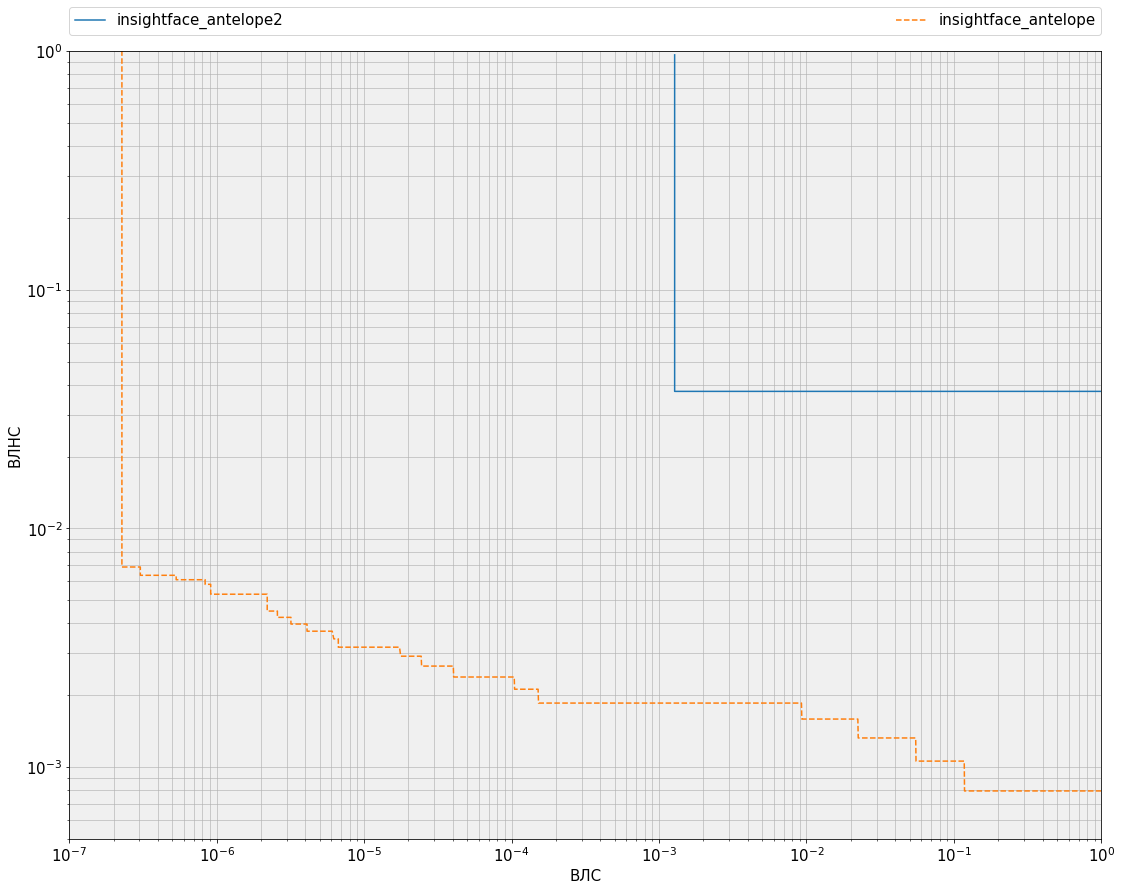

In [7]:
vdrawutils.drawROC(path=os.getenv('VT_RESULTS_PATH'), name_filter=key, axis_limits=[1E-7, 1E-0, 5E-4, 1E-0])

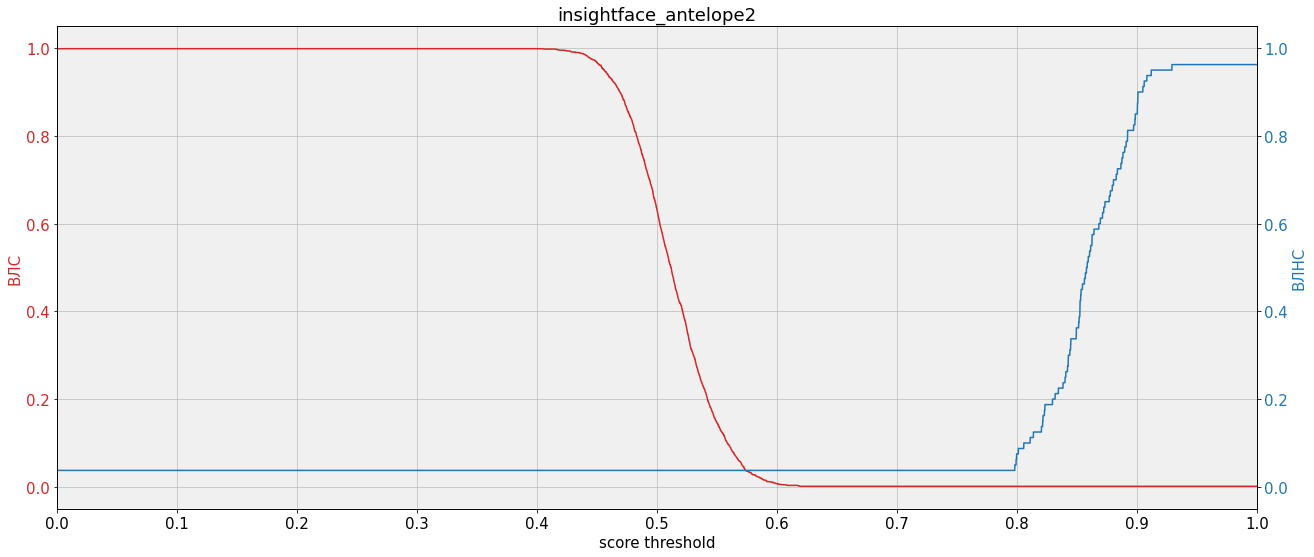

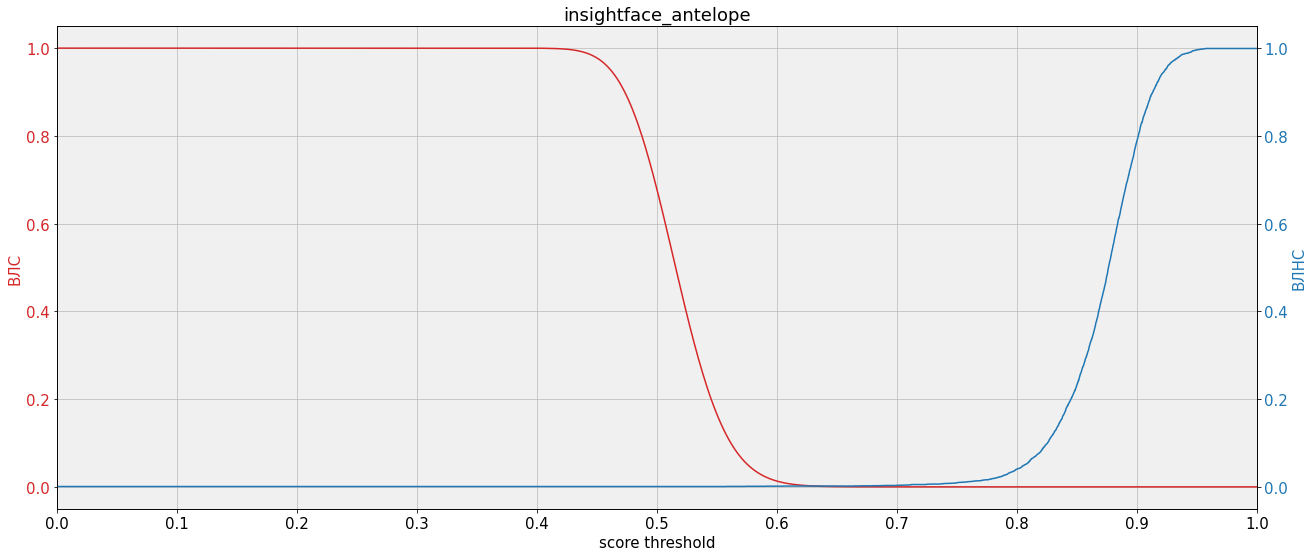

In [8]:
vdrawutils.drawWC(path=os.getenv('VT_RESULTS_PATH'), name_filter=key)